In [14]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import scale

import json

from sklearn.decomposition import PCA

inline_rc = dict(plt.rcParams)

In [15]:

reviews = []
with open('data/yelp_academic_dataset_review.json') as fl:
    i=0
    for review in fl:
        reviews.append(json.loads(review))
        i+=1
        if i + 1 > 50:
            break

df_review = pd.DataFrame(reviews)
print(df_review.head())
"""

df_review = pd.read_csv('data/yelp_reviews.csv')
print(df_review)
"""

                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

   stars  useful  funny  cool  \
0    3.0       0      0     0   
1    5.0       1      0     1   
2    3.0       0      0     0   
3    5.0       1      0     1   
4    4.0       1      0     1   

                                                text                 date  
0  If you decide to eat here, just be aware it is...  2018-07-07 22:09:11  
1  I've taken a lot of spin classes over the year...  2012-01-03 15:28:18  
2  Family diner. Had the buffet. Eclectic assortm...  2014-02-05 20:30:30  
3  Wow!  Yummy, different,  delici

"\n\ndf_review = pd.read_csv('data/yelp_reviews.csv')\nprint(df_review)\n"

In [16]:
business = []
with open('data/yelp_academic_dataset_business.json') as fl:
    for i, line in enumerate(fl):
        business.append(json.loads(line))

df_business = pd.DataFrame(business)
print(df_business.head())



              business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   

                           address           city state postal_code  \
0           1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1  87 Grasso Plaza Shopping Center         Affton    MO       63123   
2             5255 E Broadway Blvd         Tucson    AZ       85711   
3                      935 Race St   Philadelphia    PA       19107   
4                    101 Walnut St     Green Lane    PA       18054   

    latitude   longitude  stars  review_count  is_open  \
0  34.426679 -119.711197    5.0             7        0   
1  38.551126  -90.335695    3.0            15        1   
2  32.223236 -110.880452    3.5            22        0   
3  39.9555

In [17]:
useful_reviews = len(df_review[df_review["useful"]>0])
cool_reviews = len(df_review[df_review["cool"]>0])
funny_reviews = len(df_review[df_review["funny"]>0])
negative_reviws = len(df_review[df_review["stars"]<2])
positive_reviews =len(df_review[df_review["stars"]>3])
total_reviews = len(df_review)

print("Total reviews: {}".format(total_reviews))
print("Useful reviews: {}".format(useful_reviews))
print("Funny reviews: {}".format(funny_reviews))
print("Cool reviews: {}".format(cool_reviews))
print("Total negative reviews: {}".format(negative_reviws))
print("Total positive reviews: {}".format(positive_reviews))

Total reviews: 50
Useful reviews: 19
Funny reviews: 9
Cool reviews: 10
Total negative reviews: 2
Total positive reviews: 38


In [18]:
df_review = df_review.drop(["review_id", "user_id", "useful", "funny", "cool", "date"], axis=1)
df_business = df_business.drop(["name", "address", "city", "state", "postal_code", "latitude", "longitude", "stars", "review_count", "is_open", "attributes", "hours"], axis=1)

In [19]:
print(df_review.head())
print(df_business.head())

              business_id  stars  \
0  XQfwVwDr-v0ZS3_CbbE5Xw    3.0   
1  7ATYjTIgM3jUlt4UM3IypQ    5.0   
2  YjUWPpI6HXG530lwP-fb2A    3.0   
3  kxX2SOes4o-D3ZQBkiMRfA    5.0   
4  e4Vwtrqf-wpJfwesgvdgxQ    4.0   

                                                text  
0  If you decide to eat here, just be aware it is...  
1  I've taken a lot of spin classes over the year...  
2  Family diner. Had the buffet. Eclectic assortm...  
3  Wow!  Yummy, different,  delicious.   Our favo...  
4  Cute interior and owner (?) gave us tour of up...  
              business_id                                         categories
0  Pns2l4eNsfO8kk83dixA6A  Doctors, Traditional Chinese Medicine, Naturop...
1  mpf3x-BjTdTEA3yCZrAYPw  Shipping Centers, Local Services, Notaries, Ma...
2  tUFrWirKiKi_TAnsVWINQQ  Department Stores, Shopping, Fashion, Home & G...
3  MTSW4McQd7CbVtyjqoe9mw  Restaurants, Food, Bubble Tea, Coffee & Tea, B...
4  mWMc6_wTdE0EUBKIGXDVfA                          Brewpubs, Breweri

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

vectorizer = TfidfVectorizer()
lemma = WordNetLemmatizer()

X = []
for r in df_review["text"]: #Por cada review
    txt = word_tokenize(r.lower()) #Separa la review en palabras
    newtxt = ""
    for w in txt: #Por cada palabra en txt
        l = lemma.lemmatize(w) #se hace lo de quitar mayusculas y quitar raice y eso
        newtxt += l+" "
    X.append(newtxt)

X = vectorizer.fit_transform(X)
print(X)

  (0, 822)	0.12727307397942175
  (0, 308)	0.09428548960180505
  (0, 731)	0.08965686983292055
  (0, 1127)	0.11509833808409241
  (0, 719)	0.06129790522418837
  (0, 853)	0.08965686983292055
  (0, 730)	0.07608529634817696
  (0, 293)	0.11509833808409241
  (0, 46)	0.08965686983292055
  (0, 413)	0.04697750008028741
  (0, 728)	0.12727307397942175
  (0, 1113)	0.11509833808409241
  (0, 1124)	0.09428548960180505
  (0, 957)	0.11509833808409241
  (0, 1135)	0.11509833808409241
  (0, 636)	0.08965686983292055
  (0, 1060)	0.14213846258040086
  (0, 787)	0.11509833808409241
  (0, 1093)	0.21292045099426876
  (0, 1171)	0.12727307397942175
  (0, 1115)	0.11509833808409241
  (0, 736)	0.07106923129020043
  (0, 215)	0.09428548960180505
  (0, 616)	0.1793137396658411
  (0, 1101)	0.1335448009168712
  :	:
  (49, 355)	0.05375089607937894
  (49, 34)	0.05590483446668775
  (49, 506)	0.12838792608437155
  (49, 1151)	0.07836432193746364
  (49, 1044)	0.0367233130058865
  (49, 1140)	0.0679212549746568
  (49, 357)	0.0724830

In [21]:
X= X.toarray()
X=pd.DataFrame(X)
print(X)

        0        1         2         3         4         5         6     \
0   0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
1   0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
2   0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
3   0.000000  0.19585  0.000000  0.000000  0.000000  0.000000  0.000000   
4   0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
5   0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
6   0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
7   0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
8   0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
9   0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
10  0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
11  0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
12  0.000000  0.00000  0.

In [22]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,1166,1167,1168,1169,1170,1171,1172,1173,1174,1175
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.005496,0.003917,0.003864,0.001329,0.004420,0.002129,0.001733,0.002659,0.005030,0.001733,...,0.004452,0.004275,0.005890,0.002566,0.033837,0.002545,0.016418,0.004950,0.008139,0.003995
std,0.038866,0.027697,0.019520,0.009400,0.031254,0.015056,0.012255,0.018800,0.027297,0.012255,...,0.031481,0.022186,0.029148,0.018143,0.060811,0.017999,0.049105,0.024936,0.030807,0.028250
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.051024,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.274822,0.195850,0.116009,0.066467,0.221002,0.106464,0.086653,0.132934,0.181192,0.086653,...,0.222607,0.139943,0.147666,0.128287,0.282978,0.127273,0.228759,0.146837,0.153512,0.199759


In [23]:
def plot_dendrogram(model, **kwargs):
    '''
    Esta función extrae la información de un modelo AgglomerativeClustering
    y representa su dendograma con la función dendogram de scipy.cluster.hierarchy
    '''

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot
    dendrogram(linkage_matrix, **kwargs)

In [24]:
from sklearn.decomposition import PCA

#Antes de aplicar el método de clasificación utilizamos PCA para reducir el número de atributos
print('Dim originally: ',X.shape)
#Como vamos a representar gráficamente los clusters, nos quedaremos con los 2 atributos más imporantes
pca = PCA(n_components=5)
pca.fit(X)
# Cambio de base a dos dimensiones PCA
X = pca.transform(X)
print('Dim after PCA: ',X.shape)

Dim originally:  (50, 1176)
Dim after PCA:  (50, 5)


In [25]:


# Escalado de datos
# ==============================================================================
#X_scaled = scale(X)



In [26]:
# Modelos
# ==============================================================================

modelo_hclust_complete = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'complete',
                            distance_threshold = 0,
                            n_clusters         = None
                        )
modelo_hclust_complete.fit(X=X)

modelo_hclust_average = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'average',
                            distance_threshold = 0,
                            n_clusters         = None
                        )
modelo_hclust_average.fit(X=X)

modelo_hclust_ward = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'ward',
                            distance_threshold = 0,
                            n_clusters         = None
                     )
modelo_hclust_ward.fit(X=X)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

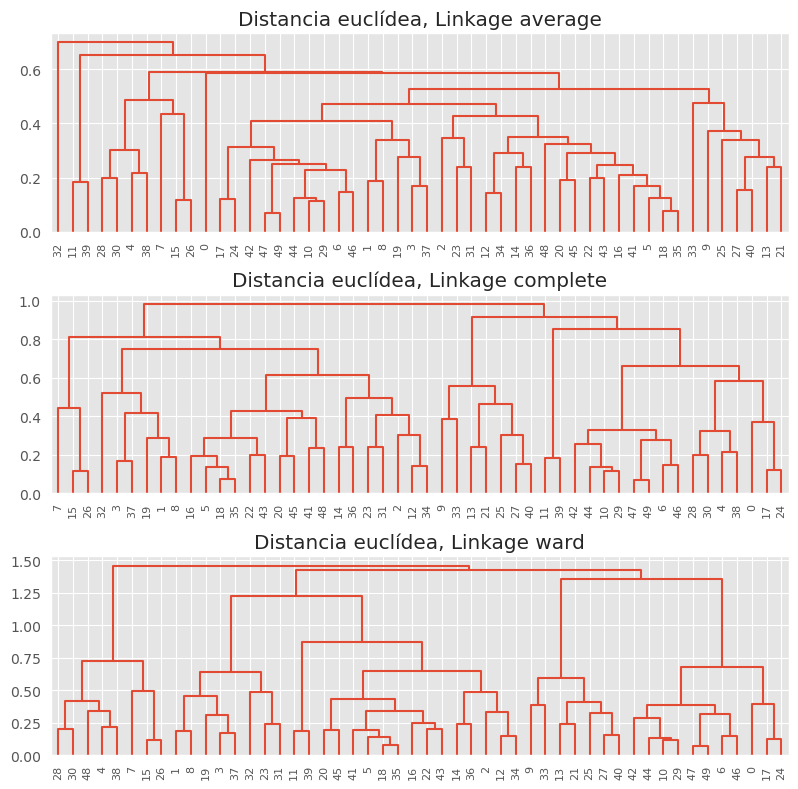

In [27]:
# Dendrogramas
# ==============================================================================
fig, axs = plt.subplots(3, 1, figsize=(8, 8))
plot_dendrogram(modelo_hclust_average, color_threshold=0, ax=axs[0])
axs[0].set_title("Distancia euclídea, Linkage average")
plot_dendrogram(modelo_hclust_complete, color_threshold=0, ax=axs[1])
axs[1].set_title("Distancia euclídea, Linkage complete")
plot_dendrogram(modelo_hclust_ward, color_threshold=0, ax=axs[2])
axs[2].set_title("Distancia euclídea, Linkage ward")
plt.tight_layout();

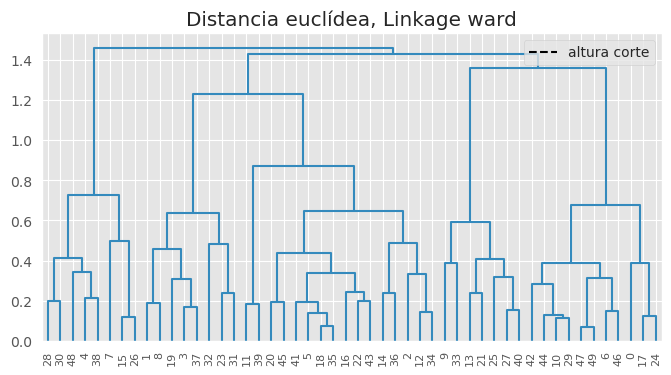

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
altura_corte = 6
plot_dendrogram(modelo_hclust_ward, color_threshold=altura_corte, ax=ax)
ax.set_title("Distancia euclídea, Linkage ward")
ax.axhline(y=altura_corte, c = 'black', linestyle='--', label='altura corte')
ax.legend();

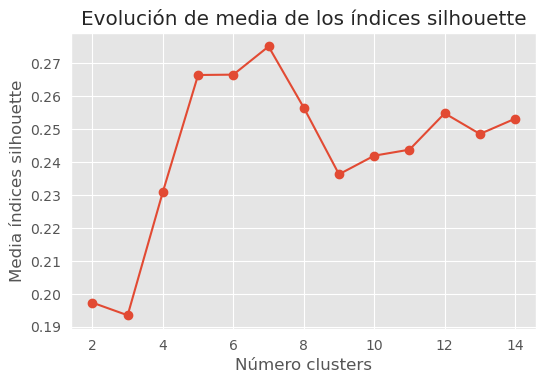

In [29]:
# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )

    cluster_labels = modelo.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

In [30]:
# Modelo
# ==============================================================================
modelo_hclust_ward = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'ward',
                            n_clusters = 3
                     )
modelo_hclust_ward.fit(X=X)

AgglomerativeClustering(n_clusters=3)